### $\textbf{INTRODUCTION / THEORY}$

#### $\textbf{Traffic Cellular Automata with Two Lanes}$


The original Nagel–Schreckenberg (NaSch) model is a discrete cellular automaton that describes vehicular traffic flow on a one-dimensional road of length L divided into cells. Each cell can be either empty or occupied by a single vehicle. Each vehicle has a discrete velocity:

$v_i \in 0,1,...,v_{max}$

$\textbf{Discrete space}$: The world is a regular grid of sites. We have a one dimensional road of length L cells, extended to two lanes

$\textbf{Finite States}$: Each cell has a finite set of possible values. In this case a cell is either empty or occupied by a vehicle. The vehicles have the discrete velocity mentioned above

$\textbf{Discrete Time}$: The system envolves in discrete time steps

$\textbf{Local Rules}$: The new state of a cell is determined by rules that depend on its own state and the states of its neighboring cells. In traffic terms this means a vehicles update depends on its own velocity and its distance to the car in front

$\textbf{Synchronous Updates}$: In each time step the update rules are applied to all vehicles simultaneously based on the state from the previous step

##### $\textbf{Stage 1 : Lane-Chnaging Formulas}$

- before any car moves, each vehicle $i$ assesses whether to change to the other lane. t
- this decision is based on two criteria, and if both are met, the vehicle changes lanes with probability $p_{lane}$.

1) $\textbf{Incentive Criterion}$: The car wants to change the lane. This happens if the gap in the new lane ($d_{ahead,new}$) is significantly larger than the gap in its current lane ($d_{ahead}$).$d_{ahead,new} > d_{ahead} + \Delta$ 

2) $\textbf{Safety Criterion}$: The car can change safely. This requires checking the space ahead and behind in the target lane.

$\textbf{Ahead:}$ The gap in the new lane must be larger than the car's current velocity, so it doesn't crash: $d_{ahead,new} > v_i$.

$\textbf{Behind:}$ The lane must be free behind the car. 

- the principle is that the gap behind ($d_{behind,new}$) must be large enough that the car approaching from behind in the new lane (let's call its velocity $v_{behind}$) will not crash into vehicle $i$.

- a common rule is $d_{behind,new} > v_{behind}$ or, for absolute safety, $d_{behind,new} > v_{max}$.


#### $\textbf{Stage 2: NaSch Movement Formulas}$ 

- After all lane changes are decided, every car performs the standard four-step NaSch update in parallel. 

- These rules are applied independently to each lane.

- For each vehicle $i$ with velocity $v_i$ and gap $d_i$ to the next car in its lane:

$\textbf{Acceleration:}$ $v_i \leftarrow \min(v_i + 1, v_{max})$ 

- if a car is not at its max velocity its speeds up by one unit

- Effect: Drivers always try to speed up to the maximum allowed velocity.

$\textbf{Deceleration}$ (Safety): $v_i \leftarrow \min(v_i, d_i)$ we can consider it collision avoidance also in some cases

- $d_i$ is the gap to the next car ahead

- if the gap is smaller than the vehicles current velocity the vehicle must slow down to $d_i$ to avoid a crash

- Effect: Drivers brake to avoid collision. If the gap is 3 cells, the velocity cannot be greater than 3.

$\textbf{Randomization:}$ $v_i \leftarrow \max(v_i - 1, 0)$ with probability $p$ 

- with a give probability p, a vehicle reduces its velocity by one, this simulates random driver behaviour and is key to creating spontaneous jams

- Effect: This is the key rule that introduces realism. 

- It models human imperfections like over-braking, random slowing, or distraction. 

- This randomness is what causes spontaneous jams.

$\textbf{Movement:}$ $x_i \leftarrow x_i + v_i$ 

- each car moves forward by $v_i$ cells where $v_i$ is the velocity calculated from steps 1 - 3

- Effect: The car moves forward by its finally-determined velocity.



## Implementation strategy

$\textbf{Periodic Boundary Conditions}$

- this means the road itself is a loop

- the cell after L-1 is cell 0

- this helps us to calculate the gap $d_i$ for vehicles near the end of the road or loop so if they are at the end of the road the next car ahead is at the beginning of the road




In [ ]:
#task 1 - Implement the two lane model

import numpy as np

#parameters

max_velocity = 5                      #maximum velocity of vehicle -> no vehicles can go faster than 5 cells per time step

road_length = 100                     #this is the length of each lane

vehicles = 40                         #total number of vehicles on the road


#we create the "world"

road = np.full((2, road_length), -1)            #we create a 2D array basically the 2 lanes the road has and we initialize all cells to -1 this means that both lanes are empty and also both lanes have the same length 


vehicle_velocities = np.random.randint(0, max_velocity + 1, size=vehicles)      #we create 40 random velocities for 40 vehicles -> we assign random values from [0,6) for 40 vehicles

total_spots = 2 * road_length                                                   #the total road length two lanes * road_length

select_positions = np.random.choice(total_spots, size=vehicles, replace=False)      #we randomly choose positions for the cars -> we basically choose 40 random numbers from 0 to 199  and we ensure that each position of each car is unique we avoid placing two cars in the same spot

road.flat[select_positions] = vehicle_velocities              #the final step where we actually place the cars on the road, for this we flatten the road so from a 2D array we make a 1D array

#we place the cars on the random positions chosen before, and we assign them the random velocities 


#the array will look something like [-1, 2, -1, -1, 3] - where we have a value != -1 that means we have a car




In [16]:
#task 2 - Symmetric case

import numpy as np

road_length = 100
vehicles = 40
max_velocity = 5
road = np.full((2, road_length), -1) 
vehicle_velocities = np.random.randint(0, max_velocity + 1, size=vehicles)
total_spots = 2 * road_length 
select_positions = np.random.choice(total_spots, size=vehicles, replace=False) 
road.flat[select_positions] = vehicle_velocities    


def find_gap_ahead(road, lane, pos):
    gap_distance = 0
    check_position = (pos + 1) % road_length

    while True:

        if check_position == pos:
            return gap_distance

        if road[lane, check_position] != -1:
            return gap_distance
        
        gap_distance += 1
        check_position = (check_position + 1) % road_length
            
        


def find_gap_behind(road, lane, pos):
    gap_distance = 0
    check_position = (pos - 1 + road_length) % road_length

    while True:

        if road[lane, check_position] != -1:
            v_behind = road[lane, check_position]
            return gap_distance, v_behind
        
        if check_position == pos:
            return gap_distance, 0
        
        gap_distance += 1
        check_position = (check_position - 1 + road_length) % road_length



time_steps = 1000
time_begin = 0
p_lane = 0.8
p_randomization = 0.3
delta_treshold = 1




while time_begin < time_steps:
    next_road = np.full((2, road_length), -1)
    
    for lane in [0,1]:
        for pos in range(road_length):
            if road[lane, pos] != -1:
                current_vehicle = road[lane, pos]
                other_lane = 1 - lane
                target_lane = lane

                d_ahead = find_gap_ahead(road= road, lane=lane, pos=pos)
                d_ahead_new = find_gap_ahead(road=road, lane=other_lane, pos=pos)
                d_behind_new, v_behind_new = find_gap_behind(road=road, lane=other_lane, pos=pos)

                if (d_ahead_new > d_ahead + delta_treshold) and (d_ahead_new > current_vehicle) and (d_behind_new > v_behind_new) and (np.random.rand() < p_lane):
                    target_lane = other_lane

                if current_vehicle != max_velocity:
                    current_vehicle += 1

                d_target = find_gap_ahead(road=road, lane= target_lane, pos=pos)
                current_vehicle = min(current_vehicle, d_target)

                if np.random.rand() < p_randomization:
                    current_vehicle = max(current_vehicle - 1, 0)

                vehicle_new_position = (current_vehicle + pos) % road_length


                next_road[target_lane, vehicle_new_position] = current_vehicle
            
    road = next_road
    time_begin += 1


density = vehicles / (2 * road_length)
average_velocity = np.sum(road[road != -1]) / vehicles
flow = density * average_velocity
print(f"Density: {density}, Average Velocity: {average_velocity:.2f}, Flow: {flow:.2f}")


p_lane = 0
vehicles = 20
road = np.full((2, road_length), -1) 
vehicle_velocities = np.random.randint(0, max_velocity + 1, size=vehicles)
total_spots = 2 * road_length 
select_positions = np.random.choice(total_spots, size=vehicles, replace=False) 
road.flat[select_positions] = vehicle_velocities    


while time_begin < time_steps:
    next_road = np.full((2, road_length), -1)
    
    for lane in [0,1]:
        for pos in range(road_length):
            if road[lane, pos] != -1:
                current_vehicle = road[lane, pos]
                other_lane = 1 - lane
                target_lane = lane

                d_ahead = find_gap_ahead(road= road, lane=lane, pos=pos)
                d_ahead_new = find_gap_ahead(road=road, lane=other_lane, pos=pos)
                d_behind_new, v_behind_new = find_gap_behind(road=road, lane=other_lane, pos=pos)

                if (d_ahead_new > d_ahead + delta_treshold) and (d_ahead_new > current_vehicle) and (d_behind_new > v_behind_new) and (np.random.rand() < p_lane):
                    target_lane = other_lane

                if current_vehicle != max_velocity:
                    current_vehicle += 1

                d_target = find_gap_ahead(road=road, lane= target_lane, pos=pos)
                current_vehicle = min(current_vehicle, d_target)

                if np.random.rand() < p_randomization:
                    current_vehicle = max(current_vehicle - 1, 0)

                vehicle_new_position = (current_vehicle + pos) % road_length


                next_road[target_lane, vehicle_new_position] = current_vehicle
            
    road = next_road
    time_begin += 1


density = vehicles / (2 * road_length)
average_velocity = np.sum(road[road != -1]) / vehicles
flow1 = density * average_velocity
print(f"Density: {density}, Average Velocity: {average_velocity}, Flow: {flow1:.2f}")        


Density: 0.2, Average Velocity: 0.72, Flow: 0.14
Density: 0.1, Average Velocity: 1.85, Flow: 0.19


In [ ]:
#task 3 - Asymmetric case

import numpy as np

road_length = 100
vehicles = 40
max_velocity = 5
road = np.full((2, road_length), -1) 
vehicle_velocities = np.random.randint(0, max_velocity + 1, size=vehicles)
total_spots = 2 * road_length 
select_positions = np.random.choice(total_spots, size=vehicles, replace=False) 
road.flat[select_positions] = vehicle_velocities    


def find_gap_ahead(road, lane, pos):
    gap_distance = 0
    check_position = (pos + 1) % road_length

    while True:

        if check_position == pos:
            return gap_distance

        if road[lane, check_position] != -1:
            return gap_distance
        
        gap_distance += 1
        check_position = (check_position + 1) % road_length
            
        


def find_gap_behind(road, lane, pos):
    gap_distance = 0
    check_position = (pos - 1 + road_length) % road_length

    while True:

        if road[lane, check_position] != -1:
            v_behind = road[lane, check_position]
            return gap_distance, v_behind
        
        if check_position == pos:
            return gap_distance, 0
        
        gap_distance += 1
        check_position = (check_position - 1 + road_length) % road_length

def find_velocity_ahead(road, lane, pos):
    check_position = (pos + 1) % road_length
    while True:

        if check_position == pos:
            return max_velocity

        if road[lane, check_position] != -1:
            v_ahead = road[lane, check_position]
            return v_ahead
        
        check_position = (check_position + 1) % road_length


p_lane = 0.8

next_road = np.full((2, road_length), -1)
time_begin=0
time_steps=1000
p_randomization = 0.3

while time_begin < time_steps:
    for lane in [0,1]:
        for pos in range(road_length):
            if road[lane, pos] != -1:
                current_vehicle = road[lane, pos]
                target_lane = lane
                other_lane = 1 - lane
                
                if lane ==0:
           
                    v_front = find_velocity_ahead(road= road, lane=lane, pos=pos)
                    d_ahead_new = find_gap_ahead(road= road, lane=1-lane, pos=pos)
                    d_behind_new, v_behind_new = find_gap_behind(road=road, lane=1 - lane, pos=pos)

                    if (current_vehicle > v_front) and (d_ahead_new > current_vehicle) and (d_behind_new > v_behind_new) and (np.random.rand() < p_lane):
                        target_lane = other_lane

                else:        

                    keep_right_treshold = 20
                    d_ahead_new = find_gap_ahead(road=road, lane= other_lane, pos=pos)
                    d_behind_new, v_behind_new = find_gap_behind(road=road, lane= other_lane, pos=pos)

                    if(d_ahead_new > keep_right_treshold) and (d_ahead_new > current_vehicle)and (d_behind_new > v_behind_new) and (np.random.rand() < p_lane):
                        target_lane = other_lane

            
                if current_vehicle != max_velocity:
                    current_vehicle += 1

                d_target = find_gap_ahead(road=road, lane= target_lane, pos=pos)
                current_vehicle = min(current_vehicle, d_target)

                if np.random.rand() < p_randomization:
                    current_vehicle = max(current_vehicle - 1, 0)

                vehicle_new_position = (current_vehicle + pos) % road_length

                next_road[target_lane, vehicle_new_position] = current_vehicle

    road = next_road
    time_begin += 1

            


Vehicles: 20, Cars left lane: 5215, Cars right lane: 4367
Average cars in left lane: 5.215, Average cars in right lane: 4.367
Fraction of cars in left lane: 0.26
Fraction of cars in right lane: 0.22
Vehicles: 40, Cars left lane: 15646, Cars right lane: 7417
Average cars in left lane: 15.646, Average cars in right lane: 7.417
Fraction of cars in left lane: 0.39
Fraction of cars in right lane: 0.19
Vehicles: 60, Cars left lane: 32407, Cars right lane: 12428
Average cars in left lane: 32.407, Average cars in right lane: 12.428
Fraction of cars in left lane: 0.54
Fraction of cars in right lane: 0.21
Vehicles: 80, Cars left lane: 45411, Cars right lane: 17230
Average cars in left lane: 45.411, Average cars in right lane: 17.23
Fraction of cars in left lane: 0.57
Fraction of cars in right lane: 0.22
Vehicles: 100, Cars left lane: 57086, Cars right lane: 22642
Average cars in left lane: 57.086, Average cars in right lane: 22.642
Fraction of cars in left lane: 0.57
Fraction of cars in right la

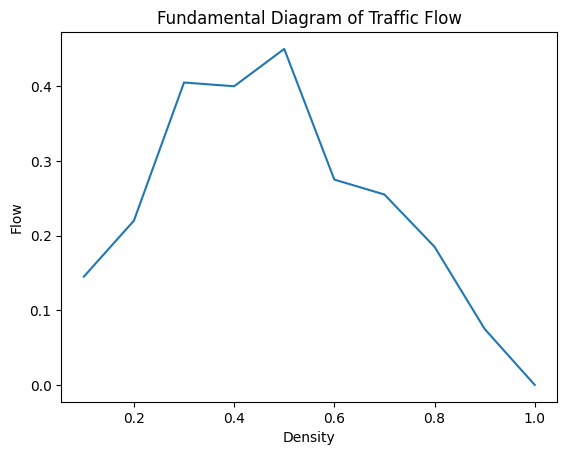

In [32]:
#task 4 - Analysis of traffic flow

import numpy as np
import matplotlib.pyplot as plt

road_length = 100
vehicles = 40
max_velocity = 5
road = np.full((2, road_length), -1) 
vehicle_velocities = np.random.randint(0, max_velocity + 1, size=vehicles)
total_spots = 2 * road_length 
select_positions = np.random.choice(total_spots, size=vehicles, replace=False) 
road.flat[select_positions] = vehicle_velocities    


def find_gap_ahead(road, lane, pos):
    gap_distance = 0
    check_position = (pos + 1) % road_length

    while True:

        if check_position == pos:
            return gap_distance

        if road[lane, check_position] != -1:
            return gap_distance
        
        gap_distance += 1
        check_position = (check_position + 1) % road_length
            
        


def find_gap_behind(road, lane, pos):
    gap_distance = 0
    check_position = (pos - 1 + road_length) % road_length

    while True:

        if road[lane, check_position] != -1:
            v_behind = road[lane, check_position]
            return gap_distance, v_behind
        
        if check_position == pos:
            return gap_distance, 0
        
        gap_distance += 1
        check_position = (check_position - 1 + road_length) % road_length

def find_velocity_ahead(road, lane, pos):
    check_position = (pos + 1) % road_length
    while True:

        if check_position == pos:
            return max_velocity

        if road[lane, check_position] != -1:
            v_ahead = road[lane, check_position]
            return v_ahead
        
        check_position = (check_position + 1) % road_length


p_lane = 0.8
time_begin=0
time_steps=1000
density_list = []
flow_list = []

for vehicles in [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]:
    road = np.full((2, road_length), -1) 
    vehicle_velocities = np.random.randint(0, max_velocity + 1, size=vehicles)
    total_spots = 2 * road_length 
    select_positions = np.random.choice(total_spots, size=vehicles, replace=False) 
    road.flat[select_positions] = vehicle_velocities   
    time_begin=0 
    cars_left = 0
    cars_right = 0
    p_randomization = 0.3
    while time_begin < time_steps:
        next_road = np.full((2, road_length), -1)
        for lane in [0,1]:
            for pos in range(road_length):
                if road[lane, pos] != -1:
                    current_vehicle = road[lane, pos]
                    target_lane = lane
                    other_lane = 1 - lane
                
                    if lane ==0:
           
                        v_front = find_velocity_ahead(road= road, lane=lane, pos=pos)
                        d_ahead_new = find_gap_ahead(road= road, lane=1-lane, pos=pos)
                        d_behind_new, v_behind_new = find_gap_behind(road=road, lane=1 - lane, pos=pos)

                        if (current_vehicle > v_front) and (d_ahead_new > current_vehicle) and (d_behind_new > v_behind_new) and (np.random.rand() < p_lane):
                            target_lane = other_lane

                    else:        

                        keep_right_treshold = 20
                        d_ahead_new = find_gap_ahead(road=road, lane= other_lane, pos=pos)
                        d_behind_new, v_behind_new = find_gap_behind(road=road, lane= other_lane, pos=pos)

                        if(d_ahead_new > keep_right_treshold) and (d_ahead_new > current_vehicle)and (d_behind_new > v_behind_new) and (np.random.rand() < p_lane):
                            target_lane = other_lane

            
                    if current_vehicle != max_velocity:
                        current_vehicle += 1

                    d_target = find_gap_ahead(road=road, lane= target_lane, pos=pos)
                    current_vehicle = min(current_vehicle, d_target)

                    if np.random.rand() < p_randomization:
                        current_vehicle = max(current_vehicle - 1, 0)

                    vehicle_new_position = (current_vehicle + pos) % road_length

                    if next_road[target_lane, vehicle_new_position] == -1: 
                        next_road[target_lane, vehicle_new_position] = current_vehicle

                    next_road[target_lane, vehicle_new_position] = current_vehicle

        road = next_road
        time_begin += 1
        cars_in_left_lane = np.count_nonzero(road[1,:] != -1)
        cars_in_right_lane = np.count_nonzero(road[0, :] != -1)
        cars_left += cars_in_left_lane
        cars_right += cars_in_right_lane
        #print(f"Vehicles: {vehicles}, Cars left lane: {cars_left}, Cars right lane: {cars_right}")
    
    print(f"Vehicles: {vehicles}, Cars left lane: {cars_left}, Cars right lane: {cars_right}")
    avg_left = cars_left / time_steps
    avg_right = cars_right / time_steps
    print(f"Average cars in left lane: {avg_left}, Average cars in right lane: {avg_right}")
    fraction_left = avg_left / vehicles
    print(f"Fraction of cars in left lane: {fraction_left:.2f}")
    fraction_right = avg_right / vehicles
    print(f"Fraction of cars in right lane: {fraction_right:.2f}")

    density = vehicles / (2 * road_length)
    density_list.append(density)
    average_velocity = np.sum(road[road != -1]) / vehicles
    flow = density * average_velocity
    flow_list.append(flow)


plt.plot(density_list, flow_list)
plt.xlabel("Density")
plt.ylabel("Flow")
plt.title("Fundamental Diagram of Traffic Flow")
plt.show()


            


First, I'll compare the flow-density $J(\rho)$ plots for the single-lane and two-lane simulations to find the "critical density" (where flow is highest). This will tell me if the two-lane road's peak happens at a higher or lower density, showing how overtaking changes the road's capacity. Next, I'll check my lane usage plot (left vs. right lane fractions) to see if the "pass left, keep right" rules made one lane get way more crowded as I added more cars, which would be spontaneous lane formation. Finally, I'll connect the dots on random braking: I know the "pass left" rule is v_current > v_front and the braking probability p is what makes v_front drop. So, a higher p must change how often cars try to overtake, and I just need to state how.